What return would a random investment strategy generate?

In [3]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
def get_2019_price_data():
    filename = "./Data/stock_prices_2019.xlsx"
    df = pd.read_excel(filename, index_col='Date')
    return df

In [49]:
dfPrice = get_2019_price_data()

In [43]:
def get_loc_matrix(sampleSize, xMax, yMax):
"""
xMax -> # of days in sample data
yMax -> # of stocks
generate maxtrix of values => [[0:sampleSize, a=0:xMax, a:yMax]]
"""
    stock = np.random.randint(0, yMax, size=sampleSize)
    p1Loc = np.random.randint(0, xMax-1, size=sampleSize)
    f = lambda x: np.random.randint(x+1, xMax)
    p2Loc = np.array(list(map(f, p1_loc)))
    return np.array((stock, p1_loc, p2_loc)).T


In [47]:
def get_price_matrix_random(p, loc):
    p1 = p[loc[:, 1], loc[:, 0]]
    p2 = p[loc[:, 2], loc[:, 0]]
#     return np.array((p1, p2)).T
    return (p2/p1-1)*100

In [131]:
p = np.array(dfPrice)
loc = get_loc_matrix(100_000, p.shape[0], p.shape[1])
random_r = get_price_matrix_random(p, loc)
random_r = random_r[~np.isnan(random_r)]

In [71]:
def print_stats(r):
    r = np.array(r)
    r = r[~np.isnan(r)]
    for i in ['mean', 'median', 'std', 'min', 'max']:
        print(f'{i}: {getattr(np, i)(r): 9.4f}')

In [108]:
print_stats(random_r)

mean:   -0.8291
median:   -0.0981
std:   28.2469
min:  -99.9676
max:  2915.0505


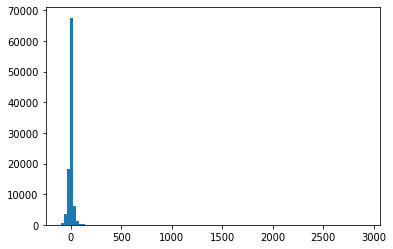

In [109]:
plt.hist(random_r, bins=100)
plt.show()

In [132]:
# remove lowest and highest 1% of range
lBound = np.percentile(random_r, 1)
uBound = np.percentile(random_r, 99)
random_r = random_r[random_r >= lBound]
random_r = random_r[random_r <= uBound]

In [133]:
len(random_r)

96006

In [134]:
print_stats(random_r)

mean:   -1.3728
median:   -0.0836
std:   17.4910
min:  -65.8203
max:   71.6418


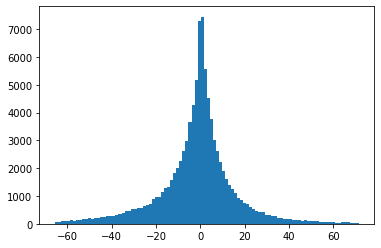

In [135]:
plt.hist(random_r, bins=100)
plt.show()

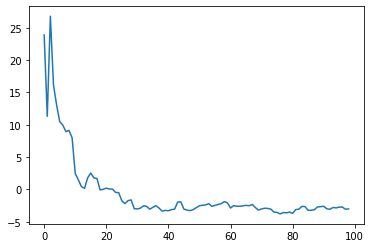

In [147]:
mean_arr = [np.mean(random_r[:i]) for i in range(1, 100)]
plt.plot(mean_arr)
plt.show()